In [1]:
# Data & Plot Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import statsmodels.formula.api as smf

In [2]:
# Load the dataset

zillow_df=pd.read_csv('datazillow.csv')

In [3]:
# Explore the info of the dataframe.

zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22515 entries, 0 to 22514
Columns: 284 entries, RegionID to 12/31/22
dtypes: float64(276), int64(2), object(6)
memory usage: 48.8+ MB


In [4]:
#Print the first 5 rows of the dataframe.

zillow_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1/31/00,2/29/00,...,3/31/22,4/30/22,5/31/22,6/30/22,7/31/22,8/31/22,9/30/22,10/31/22,11/30/22,12/31/22
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253041.0,254862.0,...,754795.0,760368.0,766827.0,771961.0,775700.0,777962.0,779620.0,781589.0,782747.0,782365.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,235321.0,235542.0,...,958517.0,977905.0,995212.0,997168.0,997462.0,982958.0,971301.0,956808.0,953225.0,950715.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,108985.0,108995.0,...,256238.0,260901.0,265355.0,268695.0,270851.0,272191.0,272430.0,273037.0,273431.0,273295.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,164384.0,164777.0,...,305046.0,306378.0,309186.0,311339.0,312572.0,312253.0,312097.0,312197.0,312381.0,310452.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114772.0,114952.0,...,284072.0,289683.0,294718.0,297669.0,298737.0,299066.0,298893.0,298380.0,298942.0,297568.0


In [5]:
# we now pick just San Francisco and save a new dataframe

sfdf = zillow_df[(zillow_df['RegionName'] == 'San Francisco') & (zillow_df['RegionType'] == 'city')]

In [6]:
# we now explore this dataframe

sfdf

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1/31/00,2/29/00,...,3/31/22,4/30/22,5/31/22,6/30/22,7/31/22,8/31/22,9/30/22,10/31/22,11/30/22,12/31/22
14,20330,14,San Francisco,city,CA,CA,"San Francisco-Oakland-Berkeley, CA",San Francisco County,449241.0,451985.0,...,1558207.0,1581600.0,1587652.0,1580236.0,1553500.0,1521513.0,1489008.0,1466578.0,1447627.0,1438754.0


In [7]:
sfdf.describe()

,RegionID,SizeRank,1/31/00,2/29/00,3/31/00,4/30/00,5/31/00,6/30/00,7/31/00,8/31/00,...,3/31/22,4/30/22,5/31/22,6/30/22,7/31/22,8/31/22,9/30/22,10/31/22,11/30/22,12/31/22
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,20330.0,14.0,449241.0,451985.0,455705.0,463561.0,472297.0,481644.0,491158.0,500993.0,...,1558207.0,1581600.0,1587652.0,1580236.0,1553500.0,1521513.0,1489008.0,1466578.0,1447627.0,1438754.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,20330.0,14.0,449241.0,451985.0,455705.0,463561.0,472297.0,481644.0,491158.0,500993.0,...,1558207.0,1581600.0,1587652.0,1580236.0,1553500.0,1521513.0,1489008.0,1466578.0,1447627.0,1438754.0
25%,20330.0,14.0,449241.0,451985.0,455705.0,463561.0,472297.0,481644.0,491158.0,500993.0,...,1558207.0,1581600.0,1587652.0,1580236.0,1553500.0,1521513.0,1489008.0,1466578.0,1447627.0,1438754.0
50%,20330.0,14.0,449241.0,451985.0,455705.0,463561.0,472297.0,481644.0,491158.0,500993.0,...,1558207.0,1581600.0,1587652.0,1580236.0,1553500.0,1521513.0,1489008.0,1466578.0,1447627.0,1438754.0
75%,20330.0,14.0,449241.0,451985.0,455705.0,463561.0,472297.0,481644.0,491158.0,500993.0,...,1558207.0,1581600.0,1587652.0,1580236.0,1553500.0,1521513.0,1489008.0,1466578.0,1447627.0,1438754.0
max,20330.0,14.0,449241.0,451985.0,455705.0,463561.0,472297.0,481644.0,491158.0,500993.0,...,1558207.0,1581600.0,1587652.0,1580236.0,1553500.0,1521513.0,1489008.0,1466578.0,1447627.0,1438754.0


In [8]:
# we inspect if there are missing values
sfdf.isna().any().sum()

# after applying that code above, we realized that there are no missing values

0

In [9]:
# as we want to make a series line, we will have trouble if the dates are in columns, 
# so we will need to transform the dates to indexes

sfdf_trans = sfdf.transpose()
sfdf_trans.head(25)

,14
RegionID,20330
SizeRank,14
RegionName,San Francisco
RegionType,city
StateName,CA
State,CA
Metro,"San Francisco-Oakland-Berkeley, CA"
CountyName,San Francisco County
1/31/00,449241.0
2/29/00,451985.0


In [10]:
# we slice the dataframe  to keep only the data that is useful (date, and values)
sfdf_sliced = sfdf_trans.iloc[8:,:]
sfdf_sliced.head(10)

,14
1/31/00,449241.0
2/29/00,451985.0
3/31/00,455705.0
4/30/00,463561.0
5/31/00,472297.0
6/30/00,481644.0
7/31/00,491158.0
8/31/00,500993.0
9/30/00,510701.0
10/31/00,520891.0


In [11]:
# rename the columns
sfdf_sliced.columns = ['value']
sfdf_sliced.head(10)

,value
1/31/00,449241.0
2/29/00,451985.0
3/31/00,455705.0
4/30/00,463561.0
5/31/00,472297.0
6/30/00,481644.0
7/31/00,491158.0
8/31/00,500993.0
9/30/00,510701.0
10/31/00,520891.0


In [36]:
sfdf_sliced.describe()

,value
count,276.0
unique,276.0
top,449241.0
freq,1.0


In [12]:
df = pd.DataFrame(sfdf_sliced, columns=['value'])
df.head(10)

,value
1/31/00,449241.0
2/29/00,451985.0
3/31/00,455705.0
4/30/00,463561.0
5/31/00,472297.0
6/30/00,481644.0
7/31/00,491158.0
8/31/00,500993.0
9/30/00,510701.0
10/31/00,520891.0


In [13]:
df['value'] = df['value'].astype(int)

In [14]:
df.dtypes

value    int64
dtype: object

<AxesSubplot:>

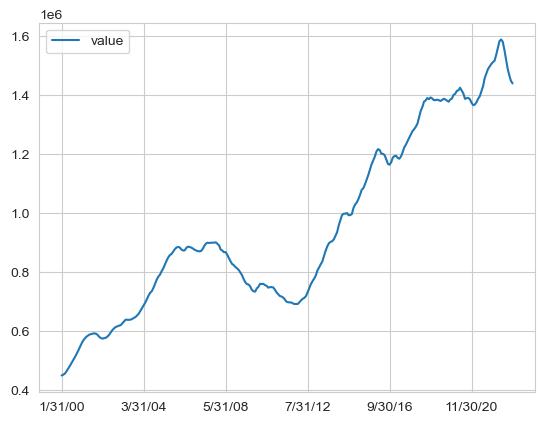

In [15]:
#plot the data.
df.plot(kind='line')

In [16]:
# we want to know what is the most recent date in the plot
timestamp = df.index.max()
ts = pd.to_datetime(timestamp)
date_only = ts.date()
print(date_only)

2022-09-30


In [17]:
# we can see that the values in San Francisco are trending downwards
# we will analyze when was that peak value, because since that date the values started to decrease

df[df['value'] == df['value'].max()]


,value
5/31/22,1587652


In [18]:
# we can see that the maximum value was in May 2022, and since that date the values have been decreasing

In [19]:
# now, we want to inspect averages per year of the values but first, we need to transform the index to a 
# date type
df.index = pd.to_datetime(df.index)


grouped = df.groupby(df.index.year)
averages = grouped.mean().astype(int)

In [20]:
df.reset_index(inplace=True)
df = df.rename(columns={'index': 'date'})
df['year'] = df['date'].dt.year

    year       Price
0   2000   489519.58
1   2001   581427.92
2   2002   593934.75
3   2003   639380.08
4   2004   723950.67
5   2005   845823.50
6   2006   878150.33
7   2007   891113.92
8   2008   849334.58
9   2009   762785.25
10  2010   750000.50
11  2011   704112.17
12  2012   733369.75
13  2013   869220.42
14  2014   990143.75
15  2015  1110211.75
16  2016  1191401.42
17  2017  1228509.08
18  2018  1359714.83
19  2019  1384197.17
20  2020  1396996.50
21  2021  1440931.08
22  2022  1522927.33


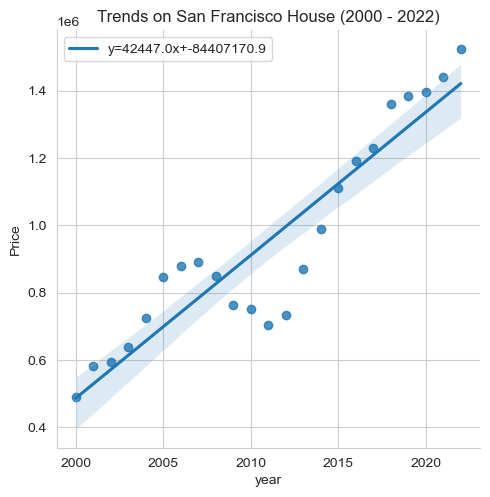

In [29]:
from scipy import stats
averageyearly = df.groupby('year')['value'].mean()
averageyearly = averageyearly.to_frame()
averageyearly['value'] = averageyearly['value'].apply(lambda x: '{:.2f}'.format(x))
averageyearly.rename(columns={'value': 'Price'}, inplace=True)
averageyearly.reset_index(inplace=True)
averageyearly['Price'] = averageyearly['Price'].astype(float)
print(averageyearly)

tips = sns.load_dataset("tips")
slope, intercept, r_value, p_value, std_err = stats.linregress(averageyearly['year'],averageyearly['Price'])
# Using seabron to create a linear fit
sns.lmplot(x='year',y='Price',data = averageyearly, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
# plot legend
plt.legend()
plt.title("Trends on San Francisco House (2000 - 2022)")

plt.show()

In [30]:
# we analyze the change year over year of the value. So, we add a new column with that calculation

averages['change_yoy'] = (averages['value'] / averages['value'].shift(1) - 1) * 100

        value  change_yoy
2000   489519         NaN
2001   581427   18.775165
2002   593934    2.151087
2003   639380    7.651692
2004   723950   13.226876
2005   845823   16.834450
2006   878150    3.821958
2007   891113    1.476171
2008   849334   -4.688407
2009   762785  -10.190220
2010   750000   -1.676095
2011   704112   -6.118400
2012   733369    4.155163
2013   869220   18.524235
2014   990143   13.911668
2015  1110211   12.126329
2016  1191401    7.313024
2017  1228509    3.114652
2018  1359714   10.680019
2019  1384197    1.800599
2020  1396996    0.924652
2021  1440931    3.144962
2022  1522927    5.690488


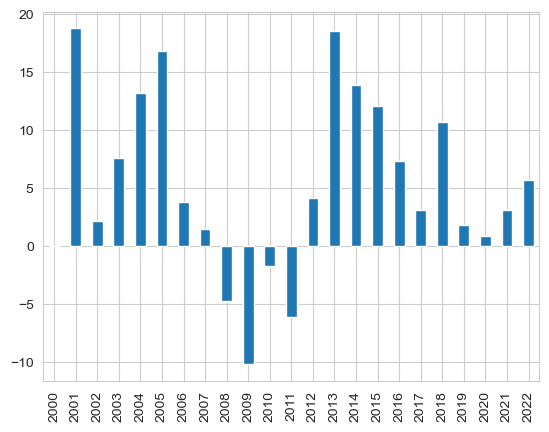

In [31]:
print(averages)
averages['change_yoy'].plot(kind='bar')
plt.show()

In [32]:
# From the graph above, the maximum increase was between year 2000 and 2001, and the maximum decrease was 
#between years 2008 and 2009 (subprime crisis)

In [33]:
# create a fitted model
lm = smf.ols(formula='Price ~ year', data=averageyearly).fit()

#print model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     125.3
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           2.61e-10
Time:                        19:27:00   Log-Likelihood:                -300.71
No. Observations:                  23   AIC:                             605.4
Df Residuals:                      21   BIC:                             607.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.441e+07   7.63e+06    -11.066      0.0

In [34]:
ypred = lm.predict({'year': [2023]})
ypred = ypred.item()
pred = "${:,.2f}".format(ypred)


#pred = pred.apply(lambda x: '${:,.2f}'.format(x))
print("The predicted average price for 2023 in San Francisco is:",pred)

The predicted average price for 2023 in San Francisco is: $1,463,153.66
